In [ ]:
import os
import cv2
import tqdm

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import plot_model

from keras import Sequential, regularizers
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Rescaling, Activation

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

MessageError: ignored

In [ ]:
import pandas as pd
TRAINDIR = '/content/drive/MyDrive/CUP_DATA/train/'
VALDIR = '/content/drive/MyDrive/CUP_DATA/val/'


In [ ]:
from tensorflow import keras
train_ds = image_dataset_from_directory(
    directory = TRAINDIR,
    labels = 'inferred',
    
    batch_size = 32,
    image_size = (256,256))
val_ds = image_dataset_from_directory(
    directory = VALDIR,
    labels = 'inferred',
    
    batch_size = 32,
    image_size = (256,256))

In [ ]:
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomFlip("horizontal")
])

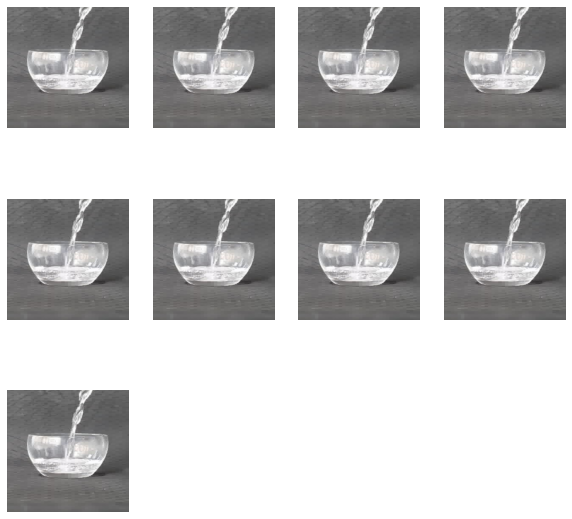

In [ ]:

import random
#random.randint(0,200)
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
from tensorflow.python.ops.numpy_ops.np_array_ops import shape
def make_model(input_shape):
  inputs = keras.Input(shape=input_shape)
  x = data_augmentation(inputs)
  x = keras.layers.Rescaling(1.0/255, offset=0.0)(x)
      
  x = layers.Conv2D(64,3, strides=1, padding='same')(inputs)
  x = layers.Conv2D(64,3, strides=1, padding='same')(x)
  x = layers.MaxPooling2D(2,strides=2)(x)
  #
  x = layers.Conv2D(128,3, strides=1, padding='same')(x)
  x = layers.Conv2D(128,3, strides=1, padding='same')(x)
  x = layers.MaxPooling2D(2,strides=2)(x)
  #
  x = layers.Conv2D(256,3, strides=1, padding='same')(x)
  x = layers.Conv2D(256,3, strides=1, padding='same')(x)
  x = layers.Conv2D(256,3, strides=1, padding='same')(x)
  x = layers.Conv2D(256,3, strides=1, padding='same')(x)
  x = layers.MaxPooling2D(2,strides=2)(x)
  #
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.MaxPooling2D(2,strides=2)(x) 
  #
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.Conv2D(512,3, strides=1, padding='same')(x)
  x = layers.MaxPooling2D(2,strides=2)(x) 
  #
  x = layers.Dense(4096, activation='sigmoid')(x)
  x = layers.Dense(4096, activation='sigmoid')(x)
  x = layers.Dense(1000, activation='sigmoid')(x)
  x = Flatten()(x)
  outputs = layers.Dense(1, activation='sigmoid')(x)  
  
  return keras.Model(inputs, outputs)



In [ ]:
model = make_model((256,256,3))
#model.summary()

In [ ]:
display(tf.keras.utils.plot_model(model, dpi = 70, show_shapes = True, expand_nested = True))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name="recall"),
      ])


In [ ]:
model.fit(train_ds, epochs=1,validation_data = val_ds)

4/4 [==============================] - 382s 85s/step - loss: 3.9609 - accuracy: 0.6635 - precision: 0.9028 - recall: 0.6989 - val_loss: 5.3256 - val_accuracy: 0.8889 - val_precision: 0.8889 - val_recall: 1.0000


In [ ]:

model.predict('/content/drive/MyDrive/CUP_DATA/val/ezgif-frame-001.jpg')

NameError: ignored

In [ ]:
export_dir = '/content/drive/MyDrive/CUP_DATA/model/'

In [ ]:
model = keras.models.load_model(export_dir)


In [ ]:
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CUP_DATA/model/assets


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
import pathlib

tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

172287516

In [ ]:
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
base_model = tf.keras.applications.Xception(weights="imagenet", input_shape=(256,256,3),include_top=False)

In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(256,256,3))
x = base_model(inputs,training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = keras.layers.Dense(1)(x)
model = keras.Model(inputs,output)

In [ ]:
base_model.trainable = True
model.compile(optimizer=keras.optimizers.Adam((1e-5)),loss = keras.losses.BinaryCrossentropy(from_logits=True),metrics=[
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name="recall"),
      ])
model.fit(train_ds,epochs = 2,validation_data = val_ds)

Epoch 1/2


InvalidArgumentError: ignored

In [ ]:
base_model.trainable = True
model.compile(optimizer=keras.optimizers.Adam((1e-5)),loss = keras.losses.BinaryCrossentropy(from_logits=True),metrics=[
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name="recall"),
      ])
model.fit(train_ds,epochs = 3,validation_data = val_ds)

In [ ]:
loss, accuracy, f1_score, precision = model.evaluate(train_ds, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


In [ ]:
from skimage.transform import resize
input_shape = (256,256,3)


In [ ]:

def predict_cup(image_path):
    image_array = plt.imread(image_path)
    resized_image = np.reshape(image_array, input_shape)
    predictions_for_classes = list(model.predict(np.array([resized_image]))[0])
    most_likely_class = int(predictions_for_classes.index(max(predictions_for_classes))) 
    print(most_likely_class)


In [ ]:
import tensorflow as tf

import pathlib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [ ]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

83184184

In [ ]:
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>